In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("whisky_products_cleaned.csv")
df.head()

,product,style,size_cl,alcohol_percentage,average_rating,totaL_reviews,in_stock,price_usd,per_litre_usd,customer_item_limit,description,date_scraped,country,organic
0,Eagle Rare 10 Year Old,Kentucky Straight Bourbon Whiskey,70.0,45.0,4.5,51.0,In Stock,49.349,70.5038,NaN,"A top-quality bourbon from Buffalo Trace, the ...",2022-06-18,United States,NaN
1,Jack Daniel's Old No. 7-Guitar Case,Tennessee Whiskey,70.0,40.0,5.0,2.0,In Stock,48.739,69.6254,NaN,"A bottle of Jack Daniel's Old No. 7, presented...",2022-06-18,United States,NaN
2,Woodford Reserve Distiller's Select,Kentucky Straight Bourbon Whiskey,70.0,43.2,5.0,97.0,In Stock,43.859,62.6592,NaN,"Woodford Reserve is a superbly smooth, flavour...",2022-06-18,United States,NaN
3,Gentleman Jack-Jack Daniel's,Tennessee Whiskey,70.0,40.0,4.5,230.0,In Stock,40.199,57.4254,NaN,Twice run through Jack Daniels’ trademark mapl...,2022-06-18,United States,NaN
4,Jack Daniel's Legacy Sour Mash-Edition 3,Tennessee Whiskey,70.0,43.0,NaN,NaN,In Stock,34.099,48.7146,NaN,A special limited-edition bottle of Jack Danie...,2022-06-18,United States,NaN


In [9]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product              842 non-null    object 
 1   style                816 non-null    object 
 2   size_cl              842 non-null    float64
 3   alcohol_percentage   842 non-null    float64
 4   average_rating       368 non-null    float64
 5   totaL_reviews        368 non-null    float64
 6   in_stock             842 non-null    object 
 7   price_usd            842 non-null    float64
 8   per_litre_usd        833 non-null    float64
 9   customer_item_limit  71 non-null     float64
 10  description          837 non-null    object 
 11  date_scraped         842 non-null    object 
 12  country              842 non-null    object 
 13  organic              18 non-null     object 
dtypes: float64(7), object(7)
memory usage: 691.4 KB


In [11]:
new_df = df.copy()

In [13]:
new_df["organic"] = new_df["organic"].fillna("false")

In [14]:
df[df.duplicated(subset="product")]

,product,style,size_cl,alcohol_percentage,average_rating,totaL_reviews,in_stock,price_usd,per_litre_usd,customer_item_limit,description,date_scraped,country,organic
189,Very Very Old Fitzgerald 1954-12 Year Old Bot....,Kentucky Straight Bourbon Whiskey,75.0,43.0,NaN,NaN,In Stock,6100.000,8133.3374,NaN,Please note\n\n\nThis is an old bottle and the...,2022-06-18,United States,NaN
262,Canadian Club Whisky-Distilled 1968 Bot.1970s,Canadian Whisky-Hiram Walker and Sons,75.0,43.4,NaN,NaN,In Stock,274.500,366.0000,NaN,Please note\n\n\nThis is an old bottle and the...,2022-06-18,Canada,NaN
498,Jameson 2007 Rarest Vintage Reserve,Blended Irish Whiskey,70.0,46.0,NaN,NaN,In Stock,1525.000,2178.5662,NaN,"The ne plus ultra from Jameson, this has been ...",2022-06-18,Ireland,NaN
550,Koval Four Grain Whiskey,American Single Barrel Whiskey,50.0,47.0,4.5,3.0,In Stock,60.085,120.1700,NaN,From Chicago's first distillery since Prohibit...,2022-06-18,USA,True
551,Koval Bourbon,American Single Barrel Bourbon Whiskey,50.0,47.0,4.0,3.0,In Stock,60.939,121.8780,NaN,"Unusually, as well as the required minimum 51%...",2022-06-18,USA,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,Amrut Naarangi,Indian Single Malt Whisky-Distillery Bottling,70.0,50.0,5.0,1.0,In Stock,158.600,226.5662,NaN,Naarangi is an innovative release from India's...,2022-06-18,India,NaN
828,Spirit of Hven Merak-Seven Stars No.2,Swedish Single Malt Whisky-Distillery Bottling,50.0,45.0,NaN,NaN,In Stock,115.839,231.6780,NaN,The second release in Spirit of Hven's Seven S...,2022-06-18,Sweden,NaN
830,Domaine des Hautes Glaces-Les Moissons Organic...,French Single Malt,70.0,44.8,NaN,NaN,In Stock,128.100,183.0000,NaN,Les Moissons Single Malt is made using organic...,2022-06-18,France,NaN
831,Spirit of Hven Dubhe-Seven Stars No.1,Swedish Single Malt Whisky-Distillery Bottling,50.0,45.0,NaN,NaN,In Stock,115.839,231.6780,NaN,The first release in Spirit of Hven's Seven St...,2022-06-18,Sweden,NaN


In [17]:
new_df = new_df.drop_duplicates(subset="product", keep="first")

In [18]:
new_df.describe()

,size_cl,alcohol_percentage,average_rating,totaL_reviews,price_usd,per_litre_usd,customer_item_limit
count,742.00000,742.000000,341.000000,341.000000,742.000000,733.000000,62.000000
mean,69.01442,46.086631,4.454545,13.061584,347.873381,490.896959,1.564516
std,20.12005,5.941760,0.664312,25.019740,2808.308385,4014.460419,1.001981
min,3.00000,0.000000,1.000000,1.000000,7.015000,5.770600,1.000000
25%,70.00000,43.000000,4.000000,1.000000,51.789000,74.859200,1.000000
50%,70.00000,46.000000,4.500000,3.000000,71.675000,105.652000,1.000000
75%,70.00000,48.225000,5.000000,10.000000,102.419000,158.514600,2.000000
max,450.00000,66.500000,5.000000,230.000000,73200.000000,104571.433800,6.000000


(array([  6.,  12., 621.,  85.,  13.,   0.,   2.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  3.  ,  25.35,  47.7 ,  70.05,  92.4 , 114.75, 137.1 , 159.45,
        181.8 , 204.15, 226.5 , 248.85, 271.2 , 293.55, 315.9 , 338.25,
        360.6 , 382.95, 405.3 , 427.65, 450.  ]),
 <BarContainer object of 20 artists>)

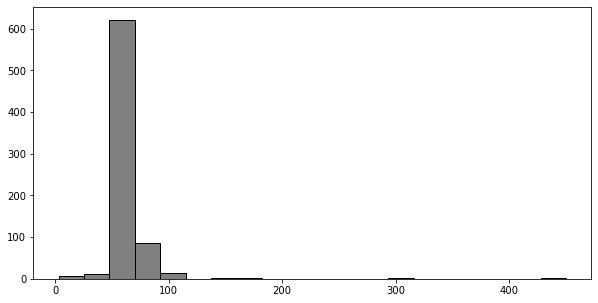

In [26]:
plt.figure(figsize=(10,5))
plt.hist(new_df["size_cl"], bins = 20, color = "grey", edgecolor = "black")

(array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1., 254., 245.,  70.,  91.,  35.,  20.,   8.,  15.]),
 array([ 0.   ,  3.325,  6.65 ,  9.975, 13.3  , 16.625, 19.95 , 23.275,
        26.6  , 29.925, 33.25 , 36.575, 39.9  , 43.225, 46.55 , 49.875,
        53.2  , 56.525, 59.85 , 63.175, 66.5  ]),
 <BarContainer object of 20 artists>)

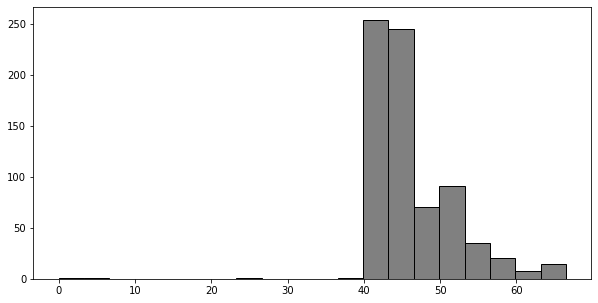

In [27]:
plt.figure(figsize=(10,5))
plt.hist(new_df["alcohol_percentage"], bins = 20, color = "grey", edgecolor = "black")

<AxesSubplot:>

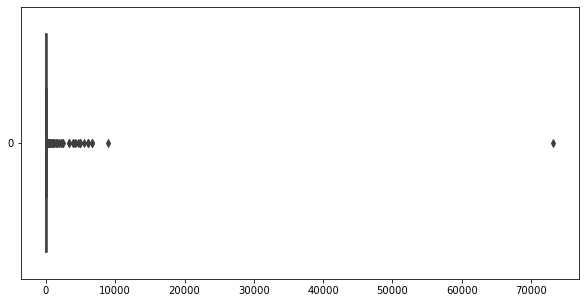

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(data = new_df["price_usd"], orient= "h")